Introduction

This analysis will look at games sold from the mid 1980's to the mid 2010's of the current consoles of that time.

Here are the areas that will be looked at specifically:

1) Game title
2) Year the game came out
3) Genre of the game
4) How much the game sold in some countries
5) Along with the platform the game is sold on

Applying the libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet

Loading the Data and Cleaning What Needs to be Editted Out

In [17]:
platform = pd.read_csv('vgsales.csv')

platform.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [18]:
# Making the dataframe name for the vgchartz csv.
games_2024 = pd.read_csv('vgchartz-2024.csv')


# Displaying the first ten games on the csv that goes to 2024.

games_2024.head(10)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,NaN
6,/games/boxart/full_call-of-duty-black-ops_5Ame...,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09,NaN
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07


This data set contained images that did not show on vs code, only giving the url to these pictures of the games. Dropped the column that used the images helps with visualization when looking at the chart. Along with dropping the picture column, four other columns were dropped: na_sales, jp_sales, pal_sales and other_sales. I wanted to get the total sales of the games all together, not what countries had the sales of the specific games.

In [19]:
drop = ['img', 'developer', 'critic_score', 'total_sales', 'jp_sales', 'pal_sales', 'other_sales', 'last_update']

games_2024 = games_2024.drop(columns=drop)

games_2024.head()

,title,console,genre,publisher,na_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,6.37,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,6.06,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,8.41,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,9.06,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,6.18,2015-11-06


In [20]:
drop = ['EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

platform = platform.drop(columns=drop)

platform.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27


In [21]:
games_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   na_sales      12637 non-null  float64
 5   release_date  56965 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.9+ MB


In [22]:
games_2024

,title,console,genre,publisher,na_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,6.37,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,6.06,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,8.41,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,9.06,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,6.18,2015-11-06
...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,NaN,2016-08-11
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,NaN,2020-07-30
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,NaN,2020-07-30
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,NaN,2019-02-28


In [23]:
platform

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27
...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00


In [24]:
games = pd.merge(games_2024, platform, left_on='title', right_on='Name')

games

,title,console,genre,publisher,na_sales,release_date,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales
0,Grand Theft Auto V,PS3,Action,Rockstar Games,6.37,2013-09-17,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01
1,Grand Theft Auto V,PS3,Action,Rockstar Games,6.37,2013-09-17,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63
2,Grand Theft Auto V,PS3,Action,Rockstar Games,6.37,2013-09-17,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80
3,Grand Theft Auto V,PS3,Action,Rockstar Games,6.37,2013-09-17,198,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.66
4,Grand Theft Auto V,PS3,Action,Rockstar Games,6.37,2013-09-17,1898,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44440,Clannad,NS,Visual Novel,Prototype,NaN,2019-07-04,14244,Clannad,PS3,2011.0,Adventure,Prototype,0.00
44441,Clannad,NS,Visual Novel,Prototype,NaN,2019-07-04,14772,Clannad,X360,2008.0,Adventure,Prototype,0.00
44442,Collar x Malice,NS,Visual Novel,Aksys Games,NaN,2020-06-25,16136,Collar x Malice,PSV,2016.0,Action,Idea Factory,0.00
44443,Muv-Luv Alternative,PSV,Visual Novel,PQube,NaN,2018-06-26,16483,Muv-Luv Alternative,PS3,2012.0,Simulation,5pb,0.00


Dropping any columns that had NaN in them to better view.

Getting the total amount of dollars in video games sales in North America alone.

In [25]:
games.to_csv("games.csv")

In [26]:
Total = games['na_sales'].sum()
print("In North America", games['na_sales'].value_counts().sum(), "dollars was made in video games.")

In North America 26376 dollars was made in video games.


Dropping some of the duplicate games that showed up in the csv.

In [27]:
games_unique_cleaned = games.drop_duplicates(subset = ['title', 'publisher', 'na_sales', 'release_date', 'Rank', 'Name', 'Platform', 'Publisher', 'NA_Sales'], keep='first')
games_unique_cleaned

,title,console,genre,publisher,na_sales,release_date,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales
0,Grand Theft Auto V,PS3,Action,Rockstar Games,6.37,2013-09-17,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01
1,Grand Theft Auto V,PS3,Action,Rockstar Games,6.37,2013-09-17,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63
2,Grand Theft Auto V,PS3,Action,Rockstar Games,6.37,2013-09-17,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80
3,Grand Theft Auto V,PS3,Action,Rockstar Games,6.37,2013-09-17,198,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.66
4,Grand Theft Auto V,PS3,Action,Rockstar Games,6.37,2013-09-17,1898,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44440,Clannad,NS,Visual Novel,Prototype,NaN,2019-07-04,14244,Clannad,PS3,2011.0,Adventure,Prototype,0.00
44441,Clannad,NS,Visual Novel,Prototype,NaN,2019-07-04,14772,Clannad,X360,2008.0,Adventure,Prototype,0.00
44442,Collar x Malice,NS,Visual Novel,Aksys Games,NaN,2020-06-25,16136,Collar x Malice,PSV,2016.0,Action,Idea Factory,0.00
44443,Muv-Luv Alternative,PSV,Visual Novel,PQube,NaN,2018-06-26,16483,Muv-Luv Alternative,PS3,2012.0,Simulation,5pb,0.00


Now getting the total of the top 5 games in North America.

In [28]:
games_filter = games.pipe(lambda x: x.loc[x['Year'] == 2015])
games_filter.head(5)

,title,console,genre,publisher,na_sales,release_date,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales
4,Grand Theft Auto V,PS3,Action,Rockstar Games,6.37,2013-09-17,1898,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36
9,Grand Theft Auto V,PS4,Action,Rockstar Games,6.06,2014-11-18,1898,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36
16,Grand Theft Auto V,X360,Action,Rockstar Games,9.06,2013-09-17,1898,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36
17,Call of Duty: Black Ops 3,PS4,Shooter,Activision,6.18,2015-11-06,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77
18,Call of Duty: Black Ops 3,PS4,Shooter,Activision,6.18,2015-11-06,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52


In [29]:
top_five_games = games.groupby('Year', as_index=False,)['na_sales'].nunique().sort_values('na_sales')
top_five_games

,Year,na_sales
37,2017.0,0
38,2020.0,1
10,1990.0,2
8,1988.0,3
4,1984.0,4
11,1991.0,5
6,1986.0,6
7,1987.0,6
5,1985.0,7
9,1989.0,7


In [30]:
per_year = games.groupby('Year')['na_sales'].sum()
print("The amount of money made in was", per_year[2015], "US dollars.")

The amount of money made in was 410.45 US dollars.


In [31]:
games.groupby('Publisher').agg({'Publisher': 'max'})['Publisher']

# publisher = games['publisher'].max()

# print(publisher)

Publisher
10TACLE Studios                              10TACLE Studios
1C Company                                        1C Company
20th Century Fox Video Games    20th Century Fox Video Games
2D Boy                                                2D Boy
3DO                                                      3DO
                                            ...             
id Software                                      id Software
imageepoch Inc.                              imageepoch Inc.
inXile Entertainment                    inXile Entertainment
mixi, Inc                                          mixi, Inc
responDESIGN                                    responDESIGN
Name: Publisher, Length: 570, dtype: object

In [32]:
print("Genre", games['genre'].value_counts().idxmax(), "had the most genre in video games.")

Genre Sports had the most genre in video games.


In [33]:
plt.style.use('classic')
plt.figure(figsize= (12, 6))
plt.barh('na_sales', '2-15', data = games)
plt.ylabel('na_sales')
plt.xlabel('Year')
plt.title('Sales in North America')
plt.tight_layout()
plt.show()

NameError: name 'labels' is not defined

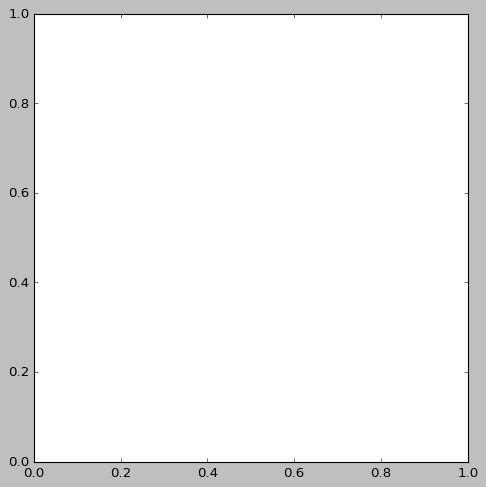

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

x = ['genres']

ax.pie(x, labels=labels, autopct='%.1f%%')
ax.set_title('Video Game Genre')
plt.tight_layout()